# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## <span style="color:blue">  Numerical exercises 1</span>

### Explanation on C++ Code & Data Generation

- The C++ code can be found in the folder "cpp_code". There are three files "ex1.cpp", "ex2.cpp" and "ex3.cpp" for the corresponding subtasks 01.1, 01.2 and 01.3. The dependencies of these files and how to compile them should become clear from the "makefile".
- The generated data - that are used in this Jupyter-Notebook - can be found in the folder "data".

### Exercise 01.1


For the compilation of the exercises we were given a pseudo-random number generator (that uses the so-called **RANdom New York University procedure (Rannyu)**). In further exercises, the random numbers will be used as if they were distributed uniformally in the interval $[0, 1)$. Here, the assumption of a uniform distribution should be verfied (or, more precisely: we will see that the tests we conduct at least do not contradict this assumption).

For the first test, we recall that the **expectation value** of a uniform distribution is given by:
$$\langle r \rangle = \int_0^1 r dr = 1/2.$$
To estimate the expectation value of the Rannyu generator, we generate $M_{max} = 1.5 \times 10^5$ random numbers $r_i$ ($i \in \{1, ..., M_{max}\}$), further refered to as number of throws. 

In principle, we could simply calculate the progressive mean of the obtained numbers for increasing number of throws $M$ and control if a convergence towards $1/2$ is observed. In doing so, we could estimate the uncertainty on the progressive mean by using the well-known formula for the uncertainty on a sample mean. However, this would be unsatisfying because the generated sequence of "random" numbers has a certain correlation length and our uncertainty estimation would be incorrect. \
In order to account for the correlation, we divide the generated random numbers into $N=100$ blocks, each containing $L = M_{max} / N_{max} = 1500$ throws. Then, we compute the average for each block and take the obtained values as our correlation-free (approximately because correlation is still present at the edges of the blocks) variables.
For these variables, we can use our well-known uncertainty estimation:
$$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N r^2_i - \left( \frac{1}{N} \sum_{i=1}^N r_i \right)^2 \right]},$$
where $N \in \{1, ..., N_{max}\}$.
This method is called **blocking method**. Note, that the block averages are still denoted by $r_i$ in order to avoid a complicated notation.

In the figure below, we visualize the estimated expectation value $\langle r \rangle $ of the random number generator as a function of the number of throws $M$ that are used for the computation of the progressive mean. We observe that the estimated expectation value converges to the value of a uniform distribution, indicated by the red line. The uncertainty of the estimated expectation value decreases as the number of throws $M$ increases because more and more blocks are considered for the calculation of the progressive mean.  

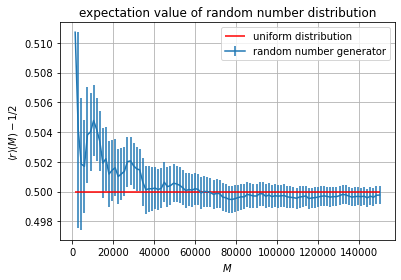

In [76]:
import numpy as np
import matplotlib.pyplot as plt

M, r_mean, r_mean_error = np.loadtxt("data/r_vs_M.txt", delimiter=',', skiprows=1, unpack = 'True')
plt.errorbar(M, r_mean, r_mean_error, label='random number generator')
plt.hlines(0.5, min(M), max(M), color='r', label='uniform distribution')
plt.xlabel(r"$M$")
plt.ylabel(r"$\langle r \rangle(M) - 1/2$")
plt.title("expectation value of random number distribution")
plt.legend()
plt.grid()
plt.show()

For the second test, we recall that the **variance** $\sigma^2$ of a uniform distribution can be computed to:
$$\sigma^2 = \langle (r - \langle r \rangle)^2 \rangle = \int_0^1 (r-1/2)^2 dr = 1/12,$$
where we used that $\langle r \rangle = 1/2$. We again choose $M_{max}=1.5 \times 10^5$ throws with $N_{max} = 100$ blocks. In the figure, we plot the progressive mean for the variance as a function of the number of throws $M$. We observe that the estimated variance of the random number generator converges to its expected value of $1/12$, as indicated by the red line.

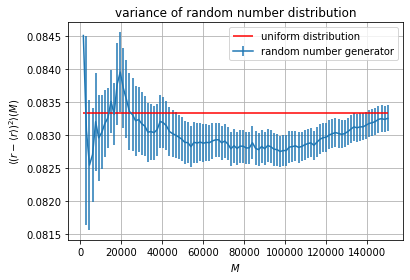

In [77]:
M, r_var, r_var_error = np.loadtxt("data/r_var_vs_M.txt", delimiter=',', skiprows=1, unpack = 'True')
plt.errorbar(M, r_var, r_var_error, label='random number generator')
plt.hlines(1/12, min(M), max(M), color='r', label='uniform distribution')
plt.xlabel(r"$M$")
plt.ylabel(r"$\langle (r - \langle r \rangle)^2 \rangle(M)$")
plt.title("variance of random number distribution")
plt.legend()
plt.grid()
plt.show()

Finally, we apply **Pearson's cumulative test**. For this purpose, we divide the interval $[0, 1)$ into $N_{intervals} = 100$ subintervals, i.e. into $[0, 0.01)$, $[0.01, 0.02)$, ...
Now, we generate $n = 10^4$ random numbers and calculate 
$$\chi^2 = \sum_{i=1}^{N_{intervals}} \frac{\left( n_i - n/N_{intervals} \right)^2}{n/N_{intervals}},$$
where $n_i$ is the number of throws that fall into the i-th. subinterval. We repeat the calculation of $\chi^2$ $100$ times. 
Below, we visualize the obtained value of $\chi^2$ for each repetition. We can see that $\chi^2$ "oscillates" around its expected value of $\chi^2_{expect} = 100$ (see exercise description for deatailed information on Pearson's cumulative test), which means that we donnot reject the hypothesis that the Rannyu procedure generates uniformally distributed numbers.

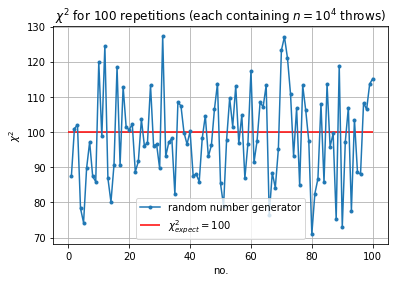

In [78]:
chi2 = np.loadtxt("data/chi2.txt", delimiter=',', skiprows=1, unpack = 'True')
no = np.arange(1, 101, 1)
plt.plot(no, chi2, marker='.', label="random number generator")
plt.hlines(100, 0, 100, color='r', label=r"$\chi^2_{expect} = 100$")
plt.xlabel("no.")
plt.ylabel(r"$\chi^2$")
plt.title(r"$\chi^2$ for $100$ repetitions (each containing $n=10^4$ throws)")
plt.legend()
plt.grid()
plt.show()

All in all, we have shown that the expectation value as well as the variance of the random number generator are similar to those of a uniform distribution. Further, "Pearson's cumulative test" did not give us a reason to reject the hypothesis that the random numbers of the Rannyu generator are distributed uniformally. So, we are confident to proceed with the following excersises treating the random numbers as uniformally distributed in the interval $[0,1)$.

### Exercise 01.2

In this exercise, 

(array([    0.,     0.,     0.,     0.,     0., 10000.,     0.,     0.,
            0.,     0.]),
 array([0.63, 0.73, 0.83, 0.93, 1.03, 1.13, 1.23, 1.33, 1.43, 1.53, 1.63]),
 <BarContainer object of 10 artists>)

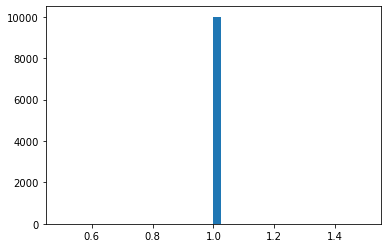

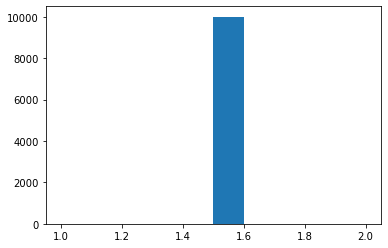

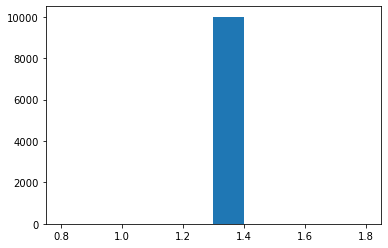

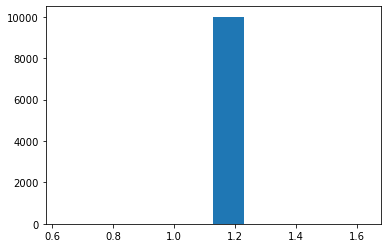

In [79]:
S_1, S_2, S_10, S_100 = np.loadtxt("data/lorentzian.txt", delimiter=',', skiprows=1, unpack = 'True', usecols=(0, 1, 2, 3))

plt.figure()
plt.hist(S_1, bins=40)
plt.figure()
plt.hist(S_2)
plt.figure()
plt.hist(S_10)
plt.figure()
plt.hist(S_100)

### Exercise 01.3